<a href="https://colab.research.google.com/github/rhwji21/Stock-Crypto-Prediction/blob/main/Stock_Crypto_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Same Day Trading
# Objective: Given Crypto prices, predict future ones
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
#enter crypto indexes
Crypto = ['BTC-USD', 'ETH-USD', 'USDT-USD']

#set up data
data = yf.download(Crypto, period="5d", interval="5m")
data = data.dropna()
data.head()
#data.shape
#print(data[4,:,:])

[*********************100%***********************]  3 of 3 completed


Adj Close                                Close  \
                                BTC-USD      ETH-USD  USDT-USD       BTC-USD   
Datetime                                                                       
2023-01-26 00:00:00+00:00  23128.992188  1613.226685  1.000185  23128.992188   
2023-01-26 00:05:00+00:00  23131.857422  1613.221680  1.000169  23131.857422   
2023-01-26 00:10:00+00:00  23129.794922  1613.386597  1.000171  23129.794922   
2023-01-26 00:15:00+00:00  23118.164062  1612.156494  1.000224  23118.164062   
2023-01-26 00:20:00+00:00  23107.519531  1611.912842  1.000222  23107.519531   

                                                          High               \
                               ETH-USD  USDT-USD       BTC-USD      ETH-USD   
Datetime                                                                      
2023-01-26 00:00:00+00:00  1613.226685  1.000185  23128.992188  1613.226685   
2023-01-26 00:05:00+00:00  1613.221680  1.000169  23140.607422  1613.592896   
2023-01-26 00:10:00+00:00  1613.386597  1.000171  23132.835938  1613.441040   
2023-01-26 00:15:00+00:00  1612.156494  1.000224  23128.615234  1613.036743   
2023-01-26 00:20:00+00:00  1611.912842  1.000222  23121.185547  1612.446167   

                                              Low                         \
                           USDT-USD       BTC-USD      ETH-USD  USDT-USD   
Datetime                                                                   
2023-01-26 00:00:00+00:00  1.000193  23096.904297  1610.675293  1.000177   
2023-01-26 00:05:00+00:00  1.000203  23127.171875  1612.948364  1.000163   
2023-01-26 00:10:00+00:00  1.000181  23127.205078  1612.736084  1.000167   
2023-01-26 00:15:00+00:00  1.000224  23118.164062  1612.156494  1.000166   
2023-01-26 00:20:00+00:00  1.000222  23105.355469  1611.543701  1.000209   

                                   Open                           Volume  \
                                BTC-USD      ETH-USD  USDT-USD   BTC-USD   
Datetime                                                                   
2023-01-26 00:00:00+00:00  23108.955078  1611.080933  1.000193         0   
2023-01-26 00:05:00+00:00  23131.095703  1613.431885  1.000163  34512896   
2023-01-26 00:10:00+00:00  23132.835938  1613.154907  1.000177  39610368   
2023-01-26 00:15:00+00:00  23128.615234  1613.036743  1.000166   6772736   
2023-01-26 00:20:00+00:00  23121.185547  1612.446167  1.000211         0   

                                               
                            ETH-USD  USDT-USD  
Datetime                                       
2023-01-26 00:00:00+00:00         0         0  
2023-01-26 00:05:00+00:00   6921216  19283968  
2023-01-26 00:10:00+00:00  11411456   7749632  
2023-01-26 00:15:00+00:00         0         0  
2023-01-26 00:20:00+00:00         0         0

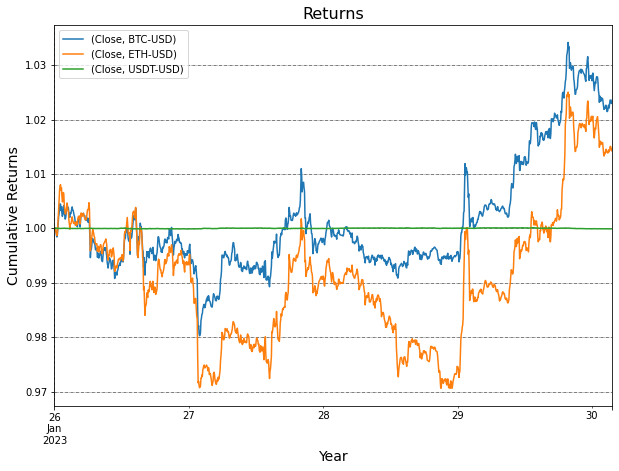

In [ ]:
# Plot all the close prices
close = data.iloc[:, 3:6]
((close.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
(close.columns)
datacol = close['Close']['BTC-USD'].values

In [ ]:
#Kaggle Data
split_row = len(close) - int(0.5 * len(close)) # sets a value of 50% to split the training data/testing data
train_data = close.iloc[:split_row]
test_data = close.iloc[split_row:]

from sklearn.preprocessing import MinMaxScaler #scales the data between 0 and 1
datacol = close['Close']['BTC-USD'].values
traincol = datacol[:(int(datacol.size*0.5))]
testcol = datacol[(int(datacol.size*0.5)):]

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped) # now the values are between 0 and 1
test_scaled_data = sc.transform(test_shaped)

In [ ]:
X = []
y = []
time_steps = 5

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i-1, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
10/10 [==============================] - 10s 181ms/step - loss: 0.0373 - val_loss: 0.0022
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 3/100
10/10 [==============================] - 0s 26ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4/100
10/10 [==============================] - 0s 29ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 7/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0019 - val_loss: 9.1999e-04
Epoch 9/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0018 - val_loss: 9.3461e-04
Epoch 10/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0016 - val_lo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.metrics import mean_absolute_error

X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])
        #Accuracy
tf.keras.metrics.Accuracy(
    name='accuracy', dtype=None
)

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
real_price = sc.inverse_transform(real_price)


19/19 [==============================] - 0s 3ms/step


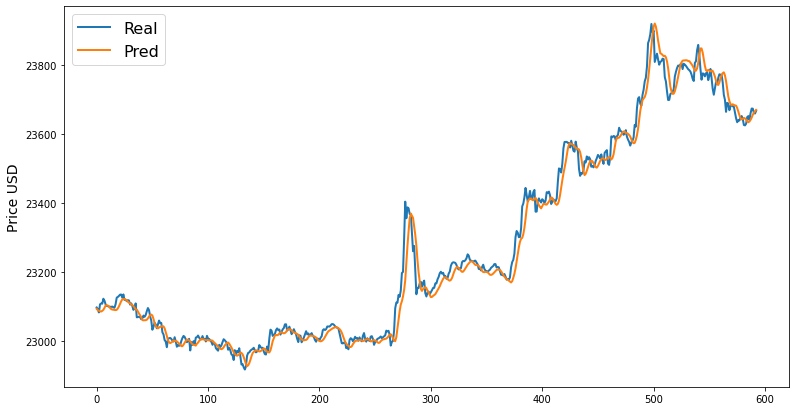

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(inv_price, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)